In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


In [13]:
df = pd.read_csv("DATA\\2016-2023-cleaned-csv.csv", )
df

,Name,MP,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,...,team,home,season,date,location,year,month,day,season_month,hour_float
0,andre drummond,37.15,6,16,0,0,6,10,8,11,...,DET,0,2016,2015-10-27,"Philips Arena, Atlanta, Georgia",2015,10,27,1,20.0
1,marcus morris,37.08,6,19,1,4,5,6,5,5,...,DET,0,2016,2015-10-27,"Philips Arena, Atlanta, Georgia",2015,10,27,1,20.0
2,kentavious caldwell-pope,37.04,7,14,4,7,3,3,1,3,...,DET,0,2016,2015-10-27,"Philips Arena, Atlanta, Georgia",2015,10,27,1,20.0
3,ersan ilyasova,34.43,6,12,3,6,1,2,3,4,...,DET,0,2016,2015-10-27,"Philips Arena, Atlanta, Georgia",2015,10,27,1,20.0
4,reggie jackson,32.11,4,10,2,4,5,5,1,7,...,DET,0,2016,2015-10-27,"Philips Arena, Atlanta, Georgia",2015,10,27,1,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216399,aaron gordon,28.65,1,6,0,2,2,4,2,5,...,DEN,1,2023,2023-06-12,"Ball Arena, Denver, Colorado",2023,6,12,9,20.5
216400,bruce brown,28.15,4,14,0,5,2,4,4,2,...,DEN,1,2023,2023-06-12,"Ball Arena, Denver, Colorado",2023,6,12,9,20.5
216401,christian braun,24.28,2,4,0,0,3,6,1,2,...,DEN,1,2023,2023-06-12,"Ball Arena, Denver, Colorado",2023,6,12,9,20.5
216402,jeff green,4.73,2,2,0,0,0,0,0,0,...,DEN,1,2023,2023-06-12,"Ball Arena, Denver, Colorado",2023,6,12,9,20.5


In [39]:
from flask import Flask, render_template, request, redirect, url_for, make_response
import io
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

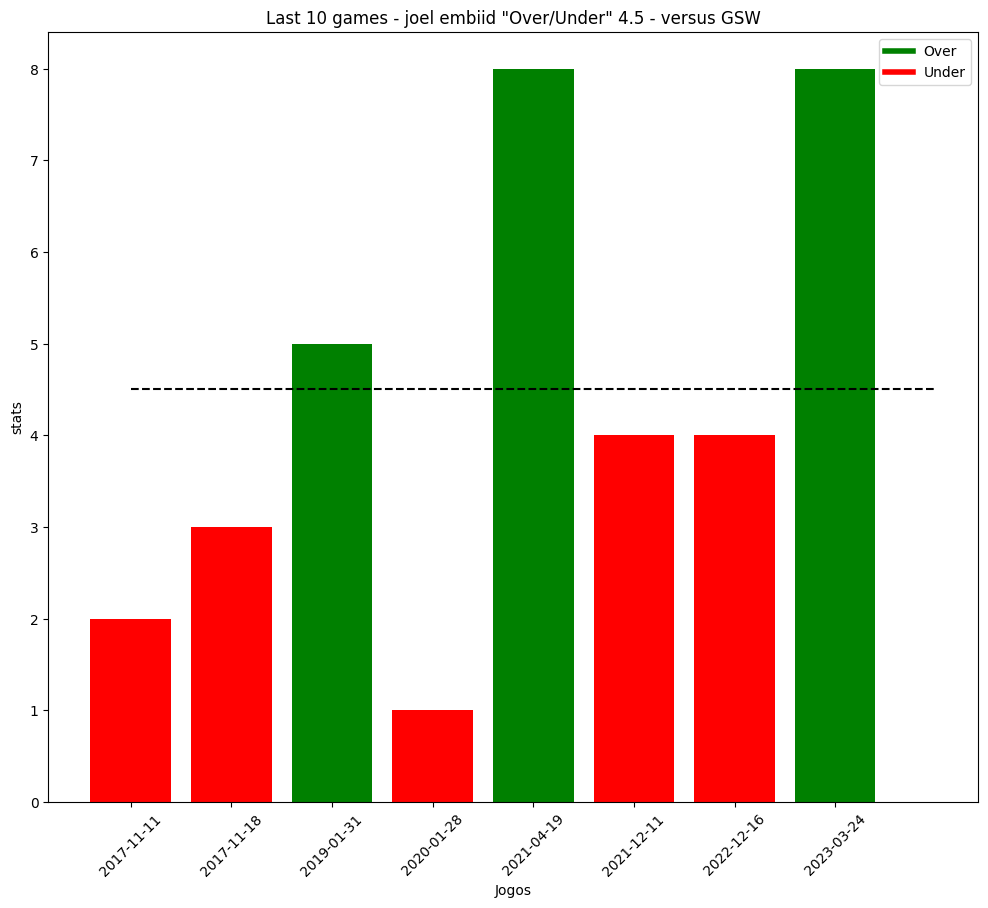

In [25]:
player_name = "joel embiid"
line = 4.5
N_games = 10
opp = "GSW"
stats = "AST"

player_df_v_opp = df[(df['Name'] == player_name) & (df['opp'] == opp)].tail(N_games)
colors = pd.Series(['green' if pts > line else 'red' for pts in player_df_v_opp[stats]])


plt.figure(figsize=(12, 10))

plt.bar(range(len(player_df_v_opp)), player_df_L10[stats], color=colors)
plt.xticks(range(len(player_df_v_opp)), player_df_L10['date'], rotation=45)
plt.plot([0, len(player_df_v_opp)], [line, line], linestyle='--', color='black', label='29.5')
plt.xlabel('Jogos')
plt.ylabel(f'stats')
plt.title(f'Last {N_games} games - {player_name} "Over/Under" {line} - versus {opp}')

legend_elements = [Line2D([0], [0], color='green', lw=4, label='Over'),
                   Line2D([0], [0], color='red', lw=4, label='Under')]
plt.legend(handles=legend_elements)
plt.show()

In [31]:
o_u = colors.replace('red', 'under')
o_u = o_u.replace('green', 'over')
print(str(o_u.value_counts()))

under    5
over     3
Name: count, dtype: int64


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [03/Nov/2023 16:19:17] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2023 16:19:17] "GET /static/style.css HTTP/1.1" 404 -
127.0.0.1 - - [03/Nov/2023 16:19:25] "POST /generate_graph HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2023 16:19:25] "GET /static/style.css HTTP/1.1" 404 -
127.0.0.1 - - [03/Nov/2023 16:19:25] "GET /grafico/giannis%20antetokounmpo/28.5/PTS HTTP/1.1" 200 -


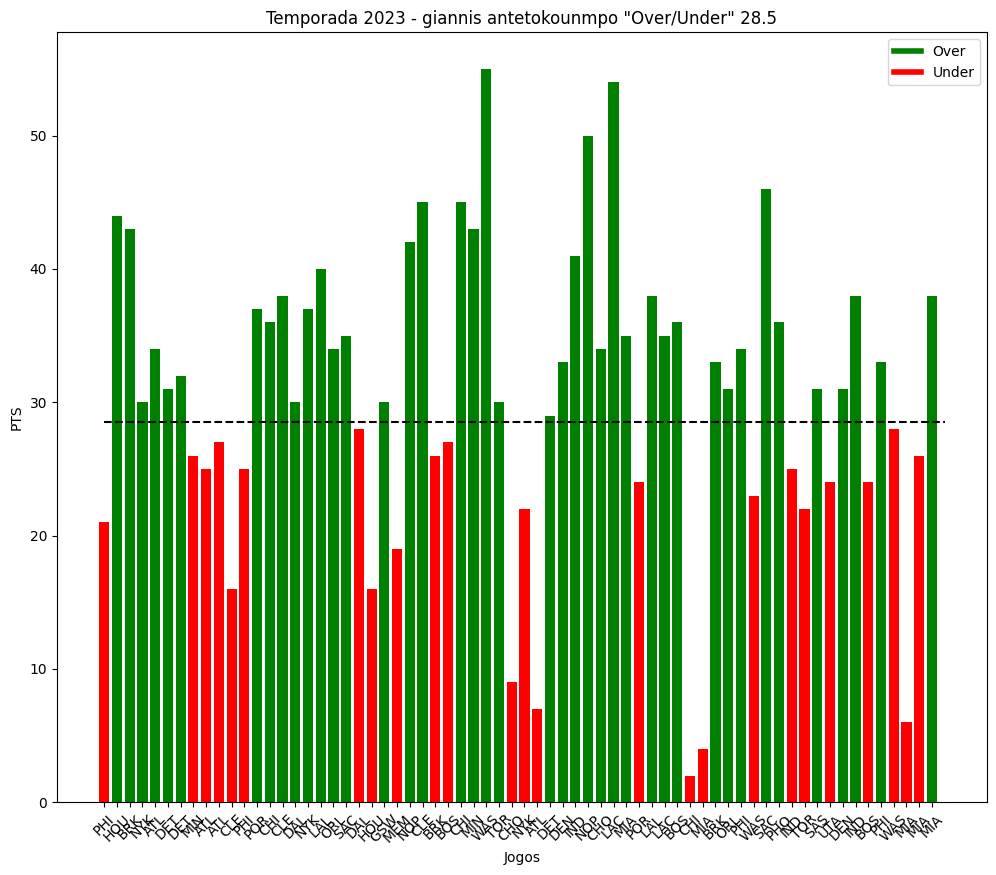

In [40]:
app = Flask(__name__)

def create_chart_s23(player_name, line, stats):
    player_df_2023 = df[(df['Name'] == player_name) & (df['season'] == 2023)]
    colors = pd.Series(['green' if pts > line else 'red' for pts in player_df_2023[stats]])


    plt.figure(figsize=(12, 10))

    plt.bar(range(len(player_df_2023)), player_df_2023[stats], color=colors)
    plt.xticks(range(len(player_df_2023)), player_df_2023['opp'], rotation=45)
    plt.plot([0, len(player_df_2023)], [line, line], linestyle='--', color='black', label='29.5')
    plt.xlabel('Jogos')
    plt.ylabel(f'{stats}')
    plt.title(f'Temporada 2023 - {player_name} "Over/Under" {line}')
    
    legend_elements = [Line2D([0], [0], color='green', lw=4, label='Over'),
                       Line2D([0], [0], color='red', lw=4, label='Under')]
    plt.legend(handles=legend_elements)
    
    
    output = io.BytesIO()
    FigureCanvas(plt.gcf()).print_png(output)

    o_u = colors.replace('red', 'under')
    o_u = o_u.replace('green', 'over')
    o_u.value_counts()
    return output, o_u


def create_chart_lastXgames(player_name, line, N_games, stats):
    player_df_L10 = df[df['Name'] == player_name].tail(N_games)
    colors = pd.Series(['green' if pts > line else 'red' for pts in player_df_L10[stats]])
    
    
    plt.figure(figsize=(12, 10))
    
    plt.bar(range(len(player_df_L10)), player_df_L10[stats], color=colors)
    plt.xticks(range(len(player_df_L10)), player_df_L10['opp'], rotation=45)
    plt.plot([0, len(player_df_L10)], [line, line], linestyle='--', color='black', label='29.5')
    plt.xlabel('Jogos')
    plt.ylabel(f'{stats}')
    plt.title(f'Last {N_games} games - {player_name} "Over/Under" {line}')
    
    legend_elements = [Line2D([0], [0], color='green', lw=4, label='Over'),
                       Line2D([0], [0], color='red', lw=4, label='Under')]
    plt.legend(handles=legend_elements)

    output = io.BytesIO()
    FigureCanvas(plt.gcf()).print_png(output)
    o_u = colors.replace('red', 'under')
    o_u = o_u.replace('green', 'over')
    o_u.value_counts()
    return output, o_u


def create_chart_opp(player_name, line, N_games, opp, stats):
    
    player_df_v_opp = df[(df['Name'] == player_name) & (df['opp'] == opp)].tail(N_games)
    colors = pd.Series(['green' if pts > line else 'red' for pts in player_df_v_opp[stats]])
    
    
    plt.figure(figsize=(12, 10))
    
    plt.bar(range(len(player_df_v_opp)), player_df_L10[stats], color=colors)
    plt.xticks(range(len(player_df_v_opp)), player_df_L10['date'], rotation=45)
    plt.plot([0, len(player_df_v_opp)], [line, line], linestyle='--', color='black', label='29.5')
    plt.xlabel('Jogos')
    plt.ylabel(f'{stats}')
    plt.title(f'Last {N_games} games - {player_name} "Over/Under" {line} - versus {opp}')
    
    legend_elements = [Line2D([0], [0], color='green', lw=4, label='Over'),
                       Line2D([0], [0], color='red', lw=4, label='Under')]
    plt.legend(handles=legend_elements)
    
    output = io.BytesIO()
    FigureCanvas(plt.gcf()).print_png(output)
    o_u = colors.replace('red', 'under')
    o_u = o_u.replace('green', 'over')
    o_u.value_counts()
    return output, o_u


@app.route('/grafico/<player_name>/<line>/<stats>')
def show_chart(player_name, line, stats):
    chart, o_u = create_chart_s23(player_name,float(line), stats)
    
    response = make_response(chart.getvalue())
    response.mimetype = 'image/png'
    
    return response


@app.route('/', methods=['GET'])
def index():
    player_list = df["Name"].unique()
    player_list.sort()
    return render_template('index.html', player_list = player_list)


@app.route('/generate_graph', methods=['POST'])
def graph_page():
    player = request.form['player']
    line = request.form['line']
    stats = request.form['stats']
    description = f"Graph for {player} with line value {line}"
    return render_template('graph.html', description=description, player=player, line=line, stats=stats)


if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)
